In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your data files
TRAIN_PATH = "/content/drive/MyDrive/Flight Rank/train.parquet"
TEST_PATH = "/content/drive/MyDrive/Flight Rank/test.parquet"




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyarrow --quiet


In [ ]:
import pyarrow.parquet as pq

# Don't load the whole file
file_path = "/content/drive/MyDrive/Flight Rank/train.parquet"

# Open the file with ParquetFile object
parquet_file = pq.ParquetFile(file_path)

# Check metadata
print("Total rows:", parquet_file.metadata.num_rows)
print("Total row groups:", parquet_file.num_row_groups)
print("Columns:", parquet_file.schema.names)


Total rows: 18145372
Total row groups: 18
Columns: ['Id', 'bySelf', 'companyID', 'corporateTariffCode', 'frequentFlyer', 'nationality', 'isAccess3D', 'isVip', 'legs0_arrivalAt', 'legs0_departureAt', 'legs0_duration', 'legs0_segments0_aircraft_code', 'legs0_segments0_arrivalTo_airport_city_iata', 'legs0_segments0_arrivalTo_airport_iata', 'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_baggageAllowance_weightMeasurementType', 'legs0_segments0_cabinClass', 'legs0_segments0_departureFrom_airport_iata', 'legs0_segments0_duration', 'legs0_segments0_flightNumber', 'legs0_segments0_marketingCarrier_code', 'legs0_segments0_operatingCarrier_code', 'legs0_segments0_seatsAvailable', 'legs0_segments1_aircraft_code', 'legs0_segments1_arrivalTo_airport_city_iata', 'legs0_segments1_arrivalTo_airport_iata', 'legs0_segments1_baggageAllowance_quantity', 'legs0_segments1_baggageAllowance_weightMeasurementType', 'legs0_segments1_cabinClass', 'legs0_segments1_departureFrom_airport_iata', 'legs

In [ ]:
# Efficiently read the first row only (row group 0, row 0)
first_row = parquet_file.read_row_group(0, columns=None).slice(0, 1).to_pandas()
first_row


,Id,bySelf,companyID,corporateTariffCode,frequentFlyer,nationality,isAccess3D,isVip,legs0_arrivalAt,legs0_departureAt,...,pricingInfo_isAccessTP,pricingInfo_passengerCount,profileId,ranker_id,requestDate,searchRoute,sex,taxes,totalPrice,selected
0,0,True,57323,<NA>,S7/SU/UT,36,False,False,2024-06-15T16:20:00,2024-06-15T15:40:00,...,1.0,1,2087645,98ce0dabf6964640b63079fbafd42cbe,2024-05-17 03:03:08,TLKKJA/KJATLK,True,370.0,16884.0,1


In [ ]:
import pyarrow.parquet as pq

# Define paths
train_path = "/content/drive/MyDrive/Flight Rank/train.parquet"
test_path = "/content/drive/MyDrive/Flight Rank/test.parquet"

# Load schema (only metadata, no memory issues)
train_schema = pq.ParquetFile(train_path).schema
test_schema = pq.ParquetFile(test_path).schema


In [ ]:
train_cols = set(train_schema.names)
test_cols = set(test_schema.names)


In [ ]:
common_cols = sorted(train_cols & test_cols)
train_only_cols = sorted(train_cols - test_cols)
test_only_cols = sorted(test_cols - train_cols)

print(f"✅ Common columns ({len(common_cols)}):\n", common_cols)
print(f"\n🧪 Only in train ({len(train_only_cols)}):\n", train_only_cols)
print(f"\n🔬 Only in test ({len(test_only_cols)}):\n", test_only_cols)


✅ Common columns (126):
 ['Id', '__index_level_0__', 'bySelf', 'companyID', 'corporateTariffCode', 'frequentFlyer', 'isAccess3D', 'isVip', 'legs0_arrivalAt', 'legs0_departureAt', 'legs0_duration', 'legs0_segments0_aircraft_code', 'legs0_segments0_arrivalTo_airport_city_iata', 'legs0_segments0_arrivalTo_airport_iata', 'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_baggageAllowance_weightMeasurementType', 'legs0_segments0_cabinClass', 'legs0_segments0_departureFrom_airport_iata', 'legs0_segments0_duration', 'legs0_segments0_flightNumber', 'legs0_segments0_marketingCarrier_code', 'legs0_segments0_operatingCarrier_code', 'legs0_segments0_seatsAvailable', 'legs0_segments1_aircraft_code', 'legs0_segments1_arrivalTo_airport_city_iata', 'legs0_segments1_arrivalTo_airport_iata', 'legs0_segments1_baggageAllowance_quantity', 'legs0_segments1_baggageAllowance_weightMeasurementType', 'legs0_segments1_cabinClass', 'legs0_segments1_departureFrom_airport_iata', 'legs0_segments1_duration

In [ ]:
import pyarrow.parquet as pq

pq_file = pq.ParquetFile("/content/drive/MyDrive/Flight Rank/train.parquet")
columns_to_sample = common_cols  # The 126 common columns

# Read one row group (1/18th of total) with only the common columns
df_sample = pq_file.read_row_group(0, columns=columns_to_sample).to_pandas()

# Show types and nulls
print(df_sample.dtypes)
print(df_sample.isnull().sum())


Id                              int64
bySelf                           bool
companyID                       int64
corporateTariffCode             Int64
frequentFlyer                  object
                            ...      
requestDate            datetime64[ns]
searchRoute                    object
sex                              bool
taxes                         float64
totalPrice                    float64
Length: 125, dtype: object
Id                          0
bySelf                      0
companyID                   0
corporateTariffCode    621618
frequentFlyer          670382
                        ...  
requestDate                 0
searchRoute                 0
sex                         0
taxes                       0
totalPrice                  0
Length: 125, dtype: int64


In [ ]:
import json

# Collect dtype info and null counts
dtype_info = df_sample.dtypes.apply(lambda x: str(x)).to_dict()
null_counts = df_sample.isnull().sum().to_dict()

# Combine into one dictionary
info = {
    "dtypes": dtype_info,
    "null_counts": null_counts
}

# Save to JSON file
with open("train_sample_metadata.json", "w") as f:
    json.dump(info, f, indent=2)

print("✅ Saved to train_sample_metadata.json")


✅ Saved to train_sample_metadata.json


In [ ]:
import json

# Load saved metadata (or directly use your dict)
with open("train_sample_metadata.json", "r") as f:
    metadata = json.load(f)

null_counts = metadata["null_counts"]
sample_size = 1048576  # Based on your sample

# Set your threshold for max allowed null ratio
null_threshold = 0.9  # Drop columns with >90% missing values

# Determine columns to drop vs keep
cols_to_drop = [col for col, count in null_counts.items() if count / sample_size > null_threshold]
cols_to_keep = [col for col in null_counts if col not in cols_to_drop]

# Show results
print(f"📉 Threshold: {null_threshold * 100}% nulls")
print(f"❌ Columns to drop: {len(cols_to_drop)}")
print(f"✅ Columns to keep: {len(cols_to_keep)}")

# Optional: print column names
#print("Dropped columns:", cols_to_drop)


📉 Threshold: 90.0% nulls
❌ Columns to drop: 50
✅ Columns to keep: 75


In [ ]:
# Load from JSON again (or reuse if already loaded)
with open("train_sample_metadata.json", "r") as f:
    metadata = json.load(f)

null_counts = metadata["null_counts"]
sample_size = 1048576
null_threshold = 0.9

# Keep columns below the null threshold
retained_columns = [col for col, count in null_counts.items() if count / sample_size <= null_threshold]

# Print them
print(f"✅ Retained Columns ({len(retained_columns)}):\n")
for col in retained_columns:
    print(col)


✅ Retained Columns (75):

Id
bySelf
companyID
corporateTariffCode
frequentFlyer
isAccess3D
isVip
legs0_arrivalAt
legs0_departureAt
legs0_duration
legs0_segments0_aircraft_code
legs0_segments0_arrivalTo_airport_city_iata
legs0_segments0_arrivalTo_airport_iata
legs0_segments0_baggageAllowance_quantity
legs0_segments0_baggageAllowance_weightMeasurementType
legs0_segments0_cabinClass
legs0_segments0_departureFrom_airport_iata
legs0_segments0_duration
legs0_segments0_flightNumber
legs0_segments0_marketingCarrier_code
legs0_segments0_operatingCarrier_code
legs0_segments0_seatsAvailable
legs0_segments1_aircraft_code
legs0_segments1_arrivalTo_airport_city_iata
legs0_segments1_arrivalTo_airport_iata
legs0_segments1_baggageAllowance_quantity
legs0_segments1_baggageAllowance_weightMeasurementType
legs0_segments1_cabinClass
legs0_segments1_departureFrom_airport_iata
legs0_segments1_duration
legs0_segments1_flightNumber
legs0_segments1_marketingCarrier_code
legs0_segments1_operatingCarrier_code
leg

In [ ]:
# Columns to drop manually
drop_cols = ['Id', 'profileId', 'ranker_id']

# Final features
final_features = [col for col in retained_columns if col not in drop_cols]

print(f"✅ Final feature count: {len(final_features)}")


✅ Final feature count: 72


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Select numeric and boolean columns only
numeric_df = df_sample.select_dtypes(include=["number", "bool"])

# Fill NaNs with a placeholder (like -1 or 0 depending on your logic)
numeric_df_filled = numeric_df.fillna(0)

# Sample rows for efficiency
sampled_df = numeric_df_filled.sample(n=min(5000, len(numeric_df_filled)), random_state=42)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(sampled_df)

# Get selected feature names
selected_columns = [col for col, keep in zip(numeric_df.columns, selector.get_support()) if keep]

# Print results
print("✅ Selected features after variance thresholding:")
print(selected_columns)
print(f"🧮 Kept: {len(selected_columns)} / {len(numeric_df.columns)} numeric features")


✅ Selected features after variance thresholding:
['Id', 'companyID', 'corporateTariffCode', 'isAccess3D', 'isVip', 'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_baggageAllowance_weightMeasurementType', 'legs0_segments0_cabinClass', 'legs0_segments0_seatsAvailable', 'legs0_segments1_baggageAllowance_quantity', 'legs0_segments1_baggageAllowance_weightMeasurementType', 'legs0_segments1_cabinClass', 'legs0_segments1_seatsAvailable', 'legs0_segments2_baggageAllowance_quantity', 'legs0_segments2_cabinClass', 'legs0_segments2_seatsAvailable', 'legs1_segments0_baggageAllowance_quantity', 'legs1_segments0_baggageAllowance_weightMeasurementType', 'legs1_segments0_cabinClass', 'legs1_segments0_seatsAvailable', 'legs1_segments1_baggageAllowance_quantity', 'legs1_segments1_baggageAllowance_weightMeasurementType', 'legs1_segments1_cabinClass', 'legs1_segments1_seatsAvailable', 'legs1_segments2_baggageAllowance_quantity', 'legs1_segments2_seatsAvailable', 'miniRules0_monetaryAmount', 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Step 1: Drop columns with >90% nulls
null_threshold = 0.9
null_ratios = df_sample.isnull().mean()
keep_cols = null_ratios[null_ratios <= null_threshold].index.tolist()

df_filtered = df_sample[keep_cols]
print(f"✅ After null filter (>90%): {len(keep_cols)} columns retained")

# Step 2: Drop rows with any nulls temporarily for variance/correlation checks
df_clean = df_filtered.dropna()
print(f"🧼 Dropped rows with nulls for variance/correlation: {df_clean.shape}")

# Step 3: Keep only numeric/boolean columns
numeric_cols = df_clean.select_dtypes(include=['number', 'bool']).columns.tolist()
df_numeric = df_clean[numeric_cols]

# Step 4: Variance Threshold
vt = VarianceThreshold(threshold=0.01)
vt.fit(df_numeric)
variance_cols = df_numeric.columns[vt.get_support()].tolist()
print(f"🔍 After low variance removal: {len(variance_cols)} columns retained")

# Step 5: Correlation filter (remove highly correlated columns)
corr_matrix = df_numeric[variance_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

correlation_cols = [col for col in variance_cols if col not in to_drop_corr]
print(f"📉 After correlation filter: {len(correlation_cols)} columns retained")

# Step 6: Manual drop of ID-like columns
id_cols = ['Id', 'profileId', 'ranker_id']
final_cols = [col for col in correlation_cols if col not in id_cols]
print(f"🧾 Final selected columns ({len(final_cols)}):\n{final_cols}")


✅ After null filter (>90%): 75 columns retained
🧼 Dropped rows with nulls for variance/correlation: (25092, 75)
🔍 After low variance removal: 29 columns retained
📉 After correlation filter: 21 columns retained
🧾 Final selected columns (19):
['companyID', 'corporateTariffCode', 'isVip', 'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_cabinClass', 'legs0_segments0_seatsAvailable', 'legs0_segments1_cabinClass', 'legs0_segments1_seatsAvailable', 'legs1_segments0_seatsAvailable', 'legs1_segments1_cabinClass', 'legs1_segments1_seatsAvailable', 'miniRules0_monetaryAmount', 'miniRules1_monetaryAmount', 'miniRules1_statusInfos', 'nationality', 'pricingInfo_isAccessTP', 'sex', 'taxes', 'totalPrice']


In [ ]:
train_path = "/content/drive/MyDrive/Flight Rank/train.parquet"

selected_features = [
    'Id',
    'companyID', 'corporateTariffCode', 'isVip',
    'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_cabinClass',
    'legs0_segments0_seatsAvailable', 'legs0_segments1_cabinClass',
    'legs0_segments1_seatsAvailable', 'legs1_segments0_seatsAvailable',
    'legs1_segments1_cabinClass', 'legs1_segments1_seatsAvailable',
    'miniRules0_monetaryAmount', 'miniRules1_monetaryAmount', 'miniRules1_statusInfos',
    'nationality', 'pricingInfo_isAccessTP', 'sex', 'taxes', 'totalPrice'
]
target_column = "selected"


In [ ]:
pq_file = pq.ParquetFile(train_path)
batch_dfs = []

for i in range(pq_file.num_row_groups):
    print(f"📦 Reading batch {i+1}/{pq_file.num_row_groups}")
    batch = pq_file.read_row_group(i, columns=selected_features).to_pandas()
    batch = batch.dropna()  # optional: or use imputation
    batch_dfs.append(batch)

train_data = pd.concat(batch_dfs, ignore_index=True)
print(f"✅ Final train data shape: {train_data.shape}")


📦 Reading batch 1/18
📦 Reading batch 2/18
📦 Reading batch 3/18
📦 Reading batch 4/18
📦 Reading batch 5/18
📦 Reading batch 6/18
📦 Reading batch 7/18
📦 Reading batch 8/18
📦 Reading batch 9/18
📦 Reading batch 10/18
📦 Reading batch 11/18
📦 Reading batch 12/18
📦 Reading batch 13/18
📦 Reading batch 14/18
📦 Reading batch 15/18
📦 Reading batch 16/18
📦 Reading batch 17/18
📦 Reading batch 18/18
✅ Final train data shape: (1156677, 20)


In [ ]:
target_data = pq.read_table(train_path, columns=["Id", target_column]).to_pandas()

# Drop duplicate columns to prevent merge error
if 'selected' in train_data.columns:
    train_data = train_data.drop(columns=['selected'])

train_data = train_data.merge(target_data, on="Id")


In [ ]:
X = train_data.drop(columns=["Id", "selected"])
y = train_data["selected"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = lgb.LGBMClassifier(
    n_estimators=1000,
    objective='binary',
    class_weight='balanced',
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)]
)


[LightGBM] [Info] Number of positive: 2702, number of negative: 922639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 925341, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.314023
[200]	valid_0's binary_logloss: 0.258456
[300]	valid_0's binary_logloss: 0.218749
[400]	valid_0's binary_logloss: 0.193057
[500]	valid_0's binary_logloss: 0.171735
[600]	valid_0's binary_logloss: 0.152972
[700]	valid_0's binary_logloss: 0.138856
[800]	valid_0's binary_logloss: 0.127944
[900]	valid_0's binary_logloss: 0.118358
[1000]	vali

LGBMClassifier(class_weight='balanced', n_estimators=1000, objective='binary',
               random_state=42)

🎯 Best Threshold = 0.95
🔁 Precision = 0.1440, Recall = 0.1376, F1 = 0.1407


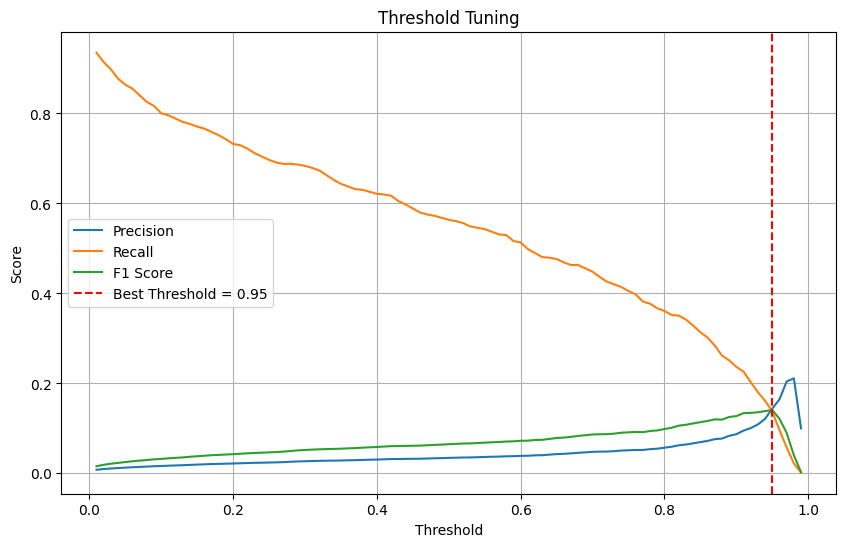

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Predict probabilities (on validation set)
y_probs = model.predict_proba(X_val)[:, 1]

# 2. Try multiple thresholds
thresholds = np.arange(0.01, 1.0, 0.01)
f1s, precisions, recalls = [], [], []

for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    precisions.append(precision_score(y_val, y_pred, zero_division=0))
    recalls.append(recall_score(y_val, y_pred))
    f1s.append(f1_score(y_val, y_pred))

# 3. Find best threshold
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]

print(f"🎯 Best Threshold = {best_threshold:.2f}")
print(f"🔁 Precision = {precisions[best_idx]:.4f}, Recall = {recalls[best_idx]:.4f}, F1 = {f1s[best_idx]:.4f}")

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = (y_pred_proba > 0.95).astype(int)  # Adjust threshold if needed

print("🔍 AUC-ROC:", roc_auc_score(y_val, y_pred_proba))
print("🎯 F1 Score:", f1_score(y_val, y_pred))
print("📈 Precision:", precision_score(y_val, y_pred))
print("📉 Recall:", recall_score(y_val, y_pred))


🔍 AUC-ROC: 0.9094748597669563
🎯 F1 Score: 0.14069591527987896
📈 Precision: 0.14396284829721362
📉 Recall: 0.13757396449704143


In [ ]:
# Use the best threshold
final_y_pred = (y_probs >= 0.95).astype(int)

# Re-evaluate
from sklearn.metrics import classification_report
print(classification_report(y_val, final_y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9975    0.9976    0.9975    230660
           1     0.1440    0.1376    0.1407       676

    accuracy                         0.9951    231336
   macro avg     0.5707    0.5676    0.5691    231336
weighted avg     0.9950    0.9951    0.9950    231336



In [ ]:
import pandas as pd
import pyarrow.parquet as pq

# ✅ Required features
selected_features = [
    'companyID', 'corporateTariffCode', 'isVip',
    'legs0_segments0_baggageAllowance_quantity', 'legs0_segments0_cabinClass', 'legs0_segments0_seatsAvailable',
    'legs0_segments1_cabinClass', 'legs0_segments1_seatsAvailable',
    'legs1_segments0_seatsAvailable', 'legs1_segments1_cabinClass', 'legs1_segments1_seatsAvailable',
    'miniRules0_monetaryAmount', 'miniRules1_monetaryAmount', 'miniRules1_statusInfos',
    'nationality', 'pricingInfo_isAccessTP', 'sex', 'taxes', 'totalPrice'
]

# 📂 Load test data
TEST_PATH = "/content/drive/MyDrive/Flight Rank/test.parquet"
test_df = pq.ParquetFile(TEST_PATH).read(columns=['Id', 'ranker_id'] + selected_features).to_pandas()

# 🔧 Fill nulls (adjust if needed)
test_df.fillna(0, inplace=True)

# 🔮 Predict probabilities
test_df['pred_proba'] = model.predict_proba(test_df[selected_features])[:, 1]

# 🏆 Rank predictions within each ranker_id group (1 = best)
test_df['selected'] = (
    test_df
    .groupby('ranker_id')['pred_proba']
    .rank(method='first', ascending=False)
    .astype(int)
)

# 🧾 Final submission file (preserve original row order)
submission = test_df[['Id', 'ranker_id', 'selected']]
submission.to_csv("submission.csv", index=False)

print("✅ Submission saved as submission.csv")


✅ Submission saved as submission.csv


In [ ]:
print(pd.read_csv("submission.csv").shape[0])


6897776
